## OBJECTIVES

Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer.

What is the overall sales trend?

Which are the Top 10 products by sales?

Which are the Most Selling Products?

Which is the most preferred Ship Mode?

Which are the Most Profitable Category and Sub-Category?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_excel('superstore_sales.xlsx')

In [3]:
sales.columns, sales.shape

(Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
        'segment', 'state', 'country', 'market', 'region', 'product_id',
        'category', 'sub_category', 'product_name', 'sales', 'quantity',
        'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
       dtype='object'),
 (51290, 21))

In [4]:
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


### Question 1: What is the overall sales trend?
    

In [5]:
sales['month_year'] = sales['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [6]:
month_sales = sales.groupby('month_year').sum()['sales'].reset_index()

C:\Users\GFB\AppData\Local\Temp\ipykernel_10048\2833970278.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_sales = sales.groupby('month_year').sum()['sales'].reset_index()


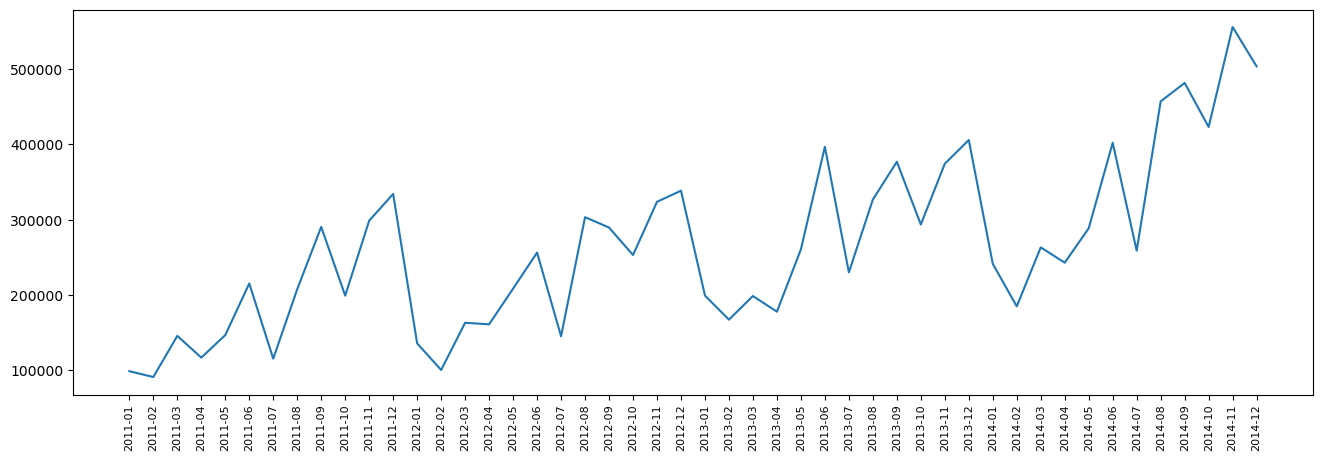

In [7]:
plt.figure(figsize=(16, 5))
plt.plot(month_sales['month_year'], month_sales['sales'])
plt.xticks(rotation='vertical', size=8)
plt.show()

### Question 2: Which are the Top 10 products by sales?

In [8]:
group_products = sales.groupby('product_name')['sales'].sum()

In [9]:
top_10_products_by_sales = group_products.sort_values(ascending=False).head(10)

In [10]:
top_10_products_by_sales

product_name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: sales, dtype: float64

### Question 3: Which are the Most Selling Products?

In [11]:
most_selling_products = sales.groupby('product_name')['quantity'].sum().sort_values(ascending=False)

In [12]:
'The most selling product is {1} units of {0}'.format(most_selling_products.reset_index()['product_name'][0], most_selling_products.reset_index()['quantity'][0])

'The most selling product is 876 units of Staples'

In [13]:
most_selling_products

product_name
Staples                                                                      876
Cardinal Index Tab, Clear                                                    337
Eldon File Cart, Single Width                                                321
Rogers File Cart, Single Width                                               262
Sanford Pencil Sharpener, Water Color                                        259
                                                                            ... 
Penpower WorldCard Pro Card Scanner                                            1
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order      1
Boston 1900 Electric Pencil Sharpener                                          1
Xerox 20                                                                       1
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs                   1
Name: quantity, Length: 3788, dtype: int64

### Question 4: Which is the most preferred Ship Mode?

In [14]:
ship_modes_counts = sales['ship_mode'].value_counts().reset_index()
ship_modes_counts.columns= ['Ship Mode', 'Counts']
ship_modes_counts

,Ship Mode,Counts
0,Standard Class,30775
1,Second Class,10309
2,First Class,7505
3,Same Day,2701


In [15]:
"The most preferred ship mode is {0} and it accounts for {1}% of the total sales made.".format(ship_modes_counts['Ship Mode'][0],((ship_modes_counts['Counts'][0]/ship_modes_counts['Counts'].sum())*100).round())

'The most preferred ship mode is Standard Class and it accounts for 60.0% of the total sales made.'

### Question 5: Which are the Most Profitable Category and Sub-Category?

In [16]:
categ_subcateg = pd.DataFrame(sales.groupby(['category', 'sub_category']).sum()['profit'])

C:\Users\GFB\AppData\Local\Temp\ipykernel_10048\684985046.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  categ_subcateg = pd.DataFrame(sales.groupby(['category', 'sub_category']).sum()['profit'])


In [17]:
categ_subcateg.sort_values(['category','profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870